In [31]:
import pandas as pd
import numpy as np 
import yfinance as yf 
import importlib
# At the beginning of your notebook
%load_ext autoreload
%autoreload 2

# Now all modules will be automatically reloaded when changed
from  generalized_fall_predictor import BitcoinFallPredictor, TargetConfig, ModelConfig


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [32]:
predictor = BitcoinFallPredictor(ticker='BTC-USD', start_date='2018-01-01')

In [33]:
predictor.collect_data()

[*********************100%***********************]  1 of 1 completed

Data collected: 2718 rows


,close,high,low,open,volume,return,log_return
Date,,,,,,,
2018-01-01,13657.200195,14112.200195,13154.700195,14112.200195,23.054555,NaN,NaN
2018-01-02,14982.099609,15444.599609,13163.599609,13625.000000,23.547415,0.097011,0.092589
2018-01-03,15201.000000,15572.799805,14844.500000,14978.200195,23.548915,0.014611,0.014505
2018-01-04,15599.200195,15739.700195,14522.200195,15270.700195,23.804405,0.026196,0.025858
2018-01-05,17429.500000,17705.199219,15202.799805,15477.200195,23.894668,0.117333,0.110945
...,...,...,...,...,...,...,...
2025-06-06,104390.343750,105376.773438,101169.570312,101574.367188,24.612156,0.027707,0.027330
2025-06-07,105615.625000,105972.757812,103987.312500,104390.648438,24.370412,0.011737,0.011669
2025-06-08,105793.648438,106497.062500,105075.328125,105617.507812,24.324031,0.001686,0.001684


In [34]:
predictor.engineer_features()


Starting feature engineering...


100%|██████████| 99/99 [03:42<00:00,  2.25s/it]

Feature engineering complete: 84 features, 2466 rows


,close,high,low,open,volume,return,log_return,cumulative_return,drawdown,ma_7d,ma_30d,ma_60d,ma_200d,vol_7d,vol_change_7d,vol_30d,vol_change_30d,vol_60d,vol_change_60d,rsi_7,rsi_14,rsi_30,rsi_60,macd,macd_signal,macd_histogram,volume_ma_7d,volume_ratio_7d,volume_ma_14d,volume_ratio_14d,volume_ma_30d,volume_ratio_30d,volume_ma_60d,volume_ratio_60d,volume_spike_1.5x,volume_spike_2.0x,volume_spike_3.0x,skew_7d,kurt_7d,zscore_7d,skew_14d,kurt_14d,zscore_14d,skew_30d,kurt_30d,zscore_30d,skew_60d,kurt_60d,zscore_60d,return_percentile_30d,price_percentile_30d,return_percentile_60d,price_percentile_60d,return_percentile_252d,price_percentile_252d,support_break_7d,resistance_break_7d,support_break_30d,resistance_break_30d,support_break_60d,resistance_break_60d,trend_7d,trend_30d,trend_60d,high_vol_regime,jump_2sigma,jump_3sigma,jump_4sigma,roc_7d,roc_14d,roc_30d,roc_60d,price_acceleration,high_vol_regime_30d,high_vol_regime_60d,day_of_week,is_weekend,is_monday,is_friday,month,is_january,is_december,quarter,frac_diff
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2018-09-10,6329.700195,6374.979980,6292.759766,6301.569824,22.035402,0.004577,0.004567,-0.536530,-0.638860,6572.467146,6655.005290,6970.139469,7726.473037,0.535170,1.239893,0.397573,-0.335805,0.503809,0.042966,15.310980,35.971063,50.440315,50.516830,-96.490072,-13.409849,-83.080224,22.198524,0.992652,22.192927,0.992902,22.160128,0.994372,22.201383,0.992524,0,0,0,-0.816625,-0.241714,0.696292,-1.323454,1.864181,0.355235,-1.079113,1.821530,0.163281,0.210318,1.278100,0.120232,0.533333,0.266667,0.550000,0.216667,0.543651,0.087302,0,0,0,0,0,0,-1,-1,-1,0,0,0,0,-12.814768,-8.060551,0.539575,1.619734,-0.007450,0,0,0,0,1,0,9,0,0,3,130.480118
2018-09-11,6321.200195,6398.919922,6260.209961,6331.879883,22.071316,-0.001343,-0.001344,-0.537153,-0.639345,6423.830008,6654.955632,6971.525309,7706.573540,0.502495,1.694262,0.397440,-0.336107,0.503825,0.042760,8.311578,28.163090,49.980597,50.425987,-114.581550,-33.644189,-80.937362,22.183607,0.994938,22.179288,0.995132,22.147251,0.996571,22.201577,0.994133,0,0,0,-0.917231,0.148285,0.623763,-1.552698,2.465674,0.244853,-1.056261,1.791635,-0.065634,0.214899,1.278888,-0.064818,0.466667,0.233333,0.450000,0.183333,0.460317,0.083333,0,0,0,0,0,0,-1,-1,-1,0,0,0,0,-14.133496,-10.922337,-0.023562,1.332955,-0.005920,0,0,1,0,0,0,9,0,0,3,107.415169
2018-09-12,6351.799805,6363.870117,6265.089844,6317.009766,22.125490,0.004841,0.004829,-0.534912,-0.637599,6360.825684,6656.763298,6972.786637,7689.267187,0.328202,-0.385507,0.397438,-0.336095,0.503774,0.044901,18.927084,30.202482,50.705291,50.388011,-125.009018,-51.917155,-73.091864,22.132791,0.999670,22.177867,0.997638,22.147089,0.999025,22.207066,0.996327,0,0,0,-0.830822,-1.179683,0.686749,-1.615280,2.536813,0.441266,-1.093598,1.849698,0.169619,0.216974,1.281288,0.130693,0.533333,0.300000,0.566667,0.233333,0.551587,0.107143,0,0,0,0,0,0,-1,-1,-1,0,0,0,0,-6.492585,-9.867242,0.861126,1.205836,0.006184,0,0,2,0,0,0,9,0,0,3,149.049228
2018-09-13,6517.310059,6535.410156,6354.240234,6354.240234,22.160945,0.026057,0.025724,-0.522793,-0.628156,6359.131417,6667.349967,6975.414469,7673.530085,0.314165,-0.451381,0.401033,-0.330756,0.505811,0.047579,49.030296,37.561267,54.059139,50.801637,-118.550986,-65.243921,-53.307065,22.094030,1.003029,22.173710,0.999424,22.139411,1.000973,22.211203,0.997737,0,0,0,-0.975194,1.933853,1.321209,-1.563281,2.297083,1.078372,-1.193590,1.981497,0.953045,0.201422,1.211221,0.789361,0.833333,0.466667,0.816667,0.333333,0.785714,0.154762,0,0,0,0,0,0,1,-1,-1,0,0,0,0,-0.181644,-6.605112,5.122822,2.479227,0.021216,0,0,3,0,0,0,9,0,0,3,294.602474
2018-09-14,6512.709961,6596.100098,6456.169922,6515.410156,22.128436,-0.000706,-0.000706,-0.523130,-0.628418,6365.651437,6674.156299,6971.597135,7654.260134,0.307445,-0.450728,0.398356,-0.306277,0.490545,-0.012157,54.118997,35.404144,52.681100,48.789012,-112.507224,-74.696582,-37.810643,22.087573,1.001850,22.166714,0.998273

In [ ]:
target_configs = [
        TargetConfig(n_sigma=5, horizon_days=30, vol_window=30, name='5_30_30'),
        TargetConfig(n_sigma=2, horizon_days=7, vol_window=7, name='2_7_7'),
        TargetConfig(n_sigma=4, horizon_days=15, vol_window=15, name='4_15_15')
    ]

# Generate targets and train models
predictor.generate_targets(target_configs)
model_config = ModelConfig(n_features=30, test_split=0.3, smote_strategy='aggressive')

Generating target variables...
  Creating target 5_30_30 (σ=5, horizon=30, vol_window=30)
    Target 5_30_30: 511 positive cases (20.722%)
  Creating target 2_7_7 (σ=2, horizon=7, vol_window=7)
    Target 2_7_7: 706 positive cases (28.629%)
  Creating target 4_15_15 (σ=4, horizon=15, vol_window=15)
    Target 4_15_15: 448 positive cases (18.167%)


In [38]:
predictor.targets

{'5_30_30': Date
 2018-09-10    0
 2018-09-11    0
 2018-09-12    0
 2018-09-13    0
 2018-09-14    0
              ..
 2025-06-06    0
 2025-06-07    0
 2025-06-08    0
 2025-06-09    0
 2025-06-10    0
 Length: 2466, dtype: int64,
 '2_7_7': Date
 2018-09-10    0
 2018-09-11    0
 2018-09-12    1
 2018-09-13    1
 2018-09-14    1
              ..
 2025-06-06    0
 2025-06-07    0
 2025-06-08    0
 2025-06-09    0
 2025-06-10    0
 Length: 2466, dtype: int64,
 '4_15_15': Date
 2018-09-10    0
 2018-09-11    0
 2018-09-12    0
 2018-09-13    0
 2018-09-14    0
              ..
 2025-06-06    0
 2025-06-07    0
 2025-06-08    0
 2025-06-09    0
 2025-06-10    0
 Length: 2466, dtype: int64}

In [39]:
predictor.train_models(target_configs)

Training logistic regression models...

Training model for target: 5_30_30
  Selected 30 features from 45 available
    Original distribution: [1330  396]
    Balanced distribution: [1330  665]
  Best parameters: {'C': 10.0, 'penalty': 'l1', 'solver': 'liblinear'}
  Train precision: 0.8209
  Test precision: 0.8518
  Overfitting gap: -0.0309

LOGISTIC REGRESSION EQUATION FOR 5_30_30
Intercept: 14.366501

Top 10 Features by |Coefficient|:
--------------------------------------------------
 1. vol_30d                  : -10.545162
 2. volume_ma_60d            :  -4.506112
 3. drawdown                 :   2.712484
 4. cumulative_return        :   2.512079
 5. vol_60d                  :   2.092172
 6. volume_ma_7d             :   1.856388
 7. volume_ma_14d            :   1.375109
 8. vol_7d                   :  -0.748397
 9. volume                   :   0.713149
10. skew_30d                 :   0.657303

Equation: P = 1 / (1 + exp(-(14.3665 + Σ(βᵢ * Xᵢ))))

Training model for target: 2_7_7


{'5_30_30': {'model': LogisticRegression(C=10.0, max_iter=1000, penalty='l1', random_state=42,
                     solver='liblinear'),
  'train_precision': 0.8208513421271633,
  'test_precision': 0.851761531610548,
  'best_params': {'C': 10.0, 'penalty': 'l1', 'solver': 'liblinear'},
  'feature_names': ['volume',
   'drawdown',
   'cumulative_return',
   'rsi_14',
   'rsi_30',
   'volume_ma_7d',
   'volume_ma_14d',
   'volume_ma_30d',
   'volume_ma_60d',
   'volume_ratio_14d',
   'skew_7d',
   'skew_14d',
   'skew_30d',
   'skew_60d',
   'kurt_7d',
   'kurt_14d',
   'support_break_7d',
   'support_break_30d',
   'support_break_60d',
   'vol_7d',
   'vol_30d',
   'vol_60d',
   'vol_change_30d',
   'month',
   'ma_7d',
   'ma_30d',
   'ma_60d',
   'roc_7d',
   'roc_14d',
   'roc_30d']},
 '2_7_7': {'model': LogisticRegression(max_iter=1000, penalty='l1', random_state=42,
                     solver='liblinear'),
  'train_precision': 0.6771517819561895,
  'test_precision': 0.729573989849

In [40]:
predictor.generate_predictions(target_configs) 

Generating ensemble predictions...


Date
2018-09-10    NaN
2018-09-11    0.0
2018-09-12    0.0
2018-09-13    0.0
2018-09-14    0.0
             ... 
2025-06-06    0.0
2025-06-07    0.0
2025-06-08    0.0
2025-06-09    0.0
2025-06-10    0.0
Length: 2466, dtype: float64

In [41]:
ret = predictor.data.log_return * predictor.generate_predictions(target_configs) 

Generating ensemble predictions...


<Axes: xlabel='Date'>

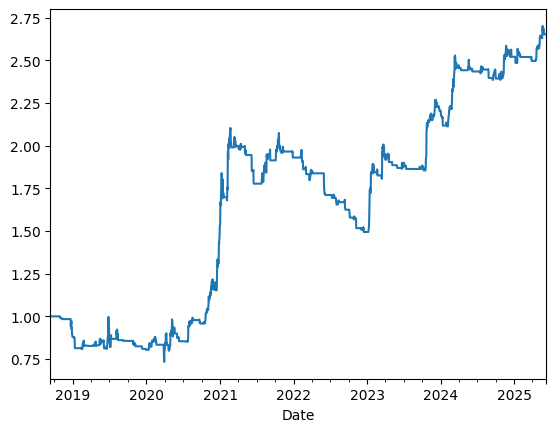

In [45]:
(ret.dropna() + 1).cumprod().plot()